In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

change control

Getting Into The data

In [2]:
train_df= pd.read_csv('/Users/yusufmehmet/Documents/GitHub/yusufmehmetcolak-2/exoTrain.csv')
train_df.head()


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:
#shape of the training df
train_df.shape

(5087, 3198)

5087 stars and 3198 flux values (features of the stars) belong to them. These flux values are used to plot the light curves we saw earlier to detect if a thar has exoplanet(s) orbiding around it.


In [4]:
#Displat the ros with null values in df
train_df[train_df.isnull().any(axis=1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


There are no missing values!

<Axes: >

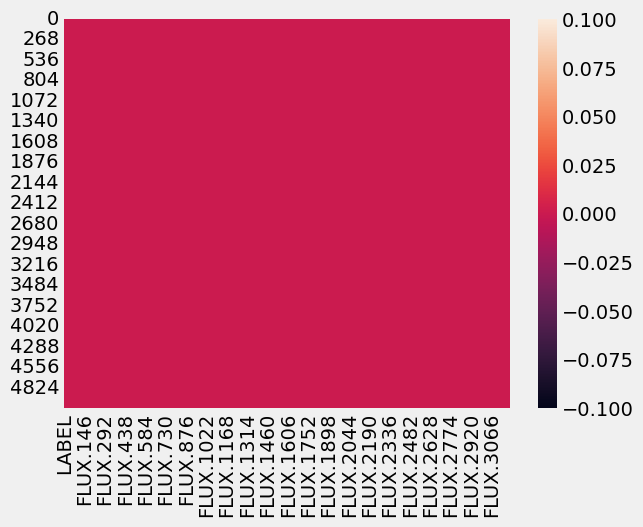

In [5]:
sns.heatmap(train_df.isnull())

this graph also shows us that we dont have any missing values for the training dataset we have. As the project requires i will distrub and add noise to data.


In [6]:
train_df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [7]:
def add_missing(col, amount):
    X = col.copy()
    size = amount if amount >= 1 else int(len(X) * amount)
    indexes = np.random.choice(len(X), size, replace = False )
    X[indexes] = np.nan
    return X

In [8]:
all_column_names = [f"FLUX.{i}" for i in range(1, 3199)]  # Generate a list of column names

noisy_cols = random.sample(all_column_names, 100) #choose random 100 of them to be spoiled
print(noisy_cols[0:100]) #print 100 of them to see if the names are correct


['FLUX.2731', 'FLUX.668', 'FLUX.1895', 'FLUX.1205', 'FLUX.2095', 'FLUX.2796', 'FLUX.43', 'FLUX.69', 'FLUX.1847', 'FLUX.3190', 'FLUX.1468', 'FLUX.1966', 'FLUX.1189', 'FLUX.7', 'FLUX.2692', 'FLUX.1590', 'FLUX.2212', 'FLUX.2023', 'FLUX.2593', 'FLUX.2576', 'FLUX.920', 'FLUX.2662', 'FLUX.245', 'FLUX.2120', 'FLUX.1164', 'FLUX.1918', 'FLUX.973', 'FLUX.2673', 'FLUX.1227', 'FLUX.2208', 'FLUX.2643', 'FLUX.2453', 'FLUX.1193', 'FLUX.2744', 'FLUX.1233', 'FLUX.877', 'FLUX.2320', 'FLUX.2814', 'FLUX.1988', 'FLUX.805', 'FLUX.1385', 'FLUX.15', 'FLUX.206', 'FLUX.1767', 'FLUX.2087', 'FLUX.2342', 'FLUX.2221', 'FLUX.158', 'FLUX.982', 'FLUX.875', 'FLUX.704', 'FLUX.3041', 'FLUX.2696', 'FLUX.1396', 'FLUX.2441', 'FLUX.584', 'FLUX.1608', 'FLUX.300', 'FLUX.3122', 'FLUX.1272', 'FLUX.1217', 'FLUX.2564', 'FLUX.1208', 'FLUX.84', 'FLUX.17', 'FLUX.1947', 'FLUX.1785', 'FLUX.1204', 'FLUX.586', 'FLUX.1867', 'FLUX.1863', 'FLUX.233', 'FLUX.2612', 'FLUX.2191', 'FLUX.49', 'FLUX.800', 'FLUX.1172', 'FLUX.2754', 'FLUX.1859', 'FL

In [9]:
amount_of_noise = 0.06

for col in noisy_cols:
    
        train_df[col] = add_missing(train_df[col], amount_of_noise)
 


In [10]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


<Axes: >

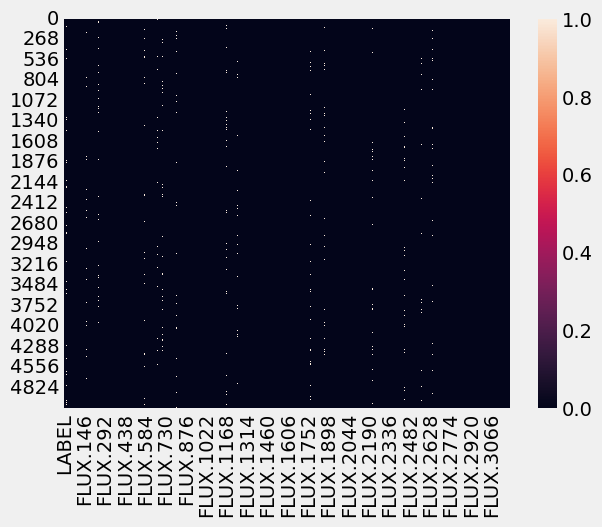

In [11]:
sns.heatmap(train_df.isnull())

as wee can see right now there are some noise has been added to the data.

In [12]:
train_df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,4.782000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,4.782000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,8.841852e+01,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,7.068275e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.470254e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.486157e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813500e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.775750e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-6.500000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.517750e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.652250e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


NOTES:
 
1. From this decription we easily understand from the mean of labels (1 or 2) that in the training set we have highly non-exoplanet samples.
2. The standard deviation is quite high across all flux columns, which implies significant variability in the flux measurements.
 
Potential Insights:

* a.The presence of high variability and large ranges in flux values might indicate significant changes in star brightness, which could be indicative of exoplanet transits.
* b.The imbalance in the LABEL column needs to be addressed during model training, possibly through techniques like resampling, stratified sampling, or using evaluation metrics that are robust to class imbalance.

In [13]:
train_df[train_df.isnull().any(axis=1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


<Axes: >

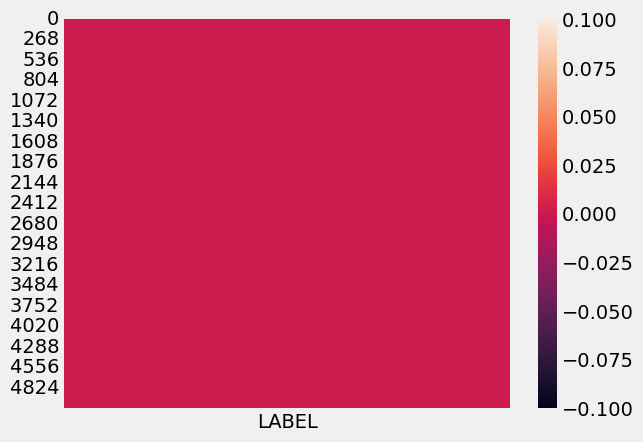

In [14]:
sns.heatmap(train_df[['LABEL']].isnull())


I intentionally didnt spoil the label values since it might have bad effect on classifying!

In [15]:
#extract the values that are labelled as 2. Which indicates the stars that have exoplanets
list(train_df[train_df['LABEL'] == 2].index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

[Text(0, 0, '5050'), Text(0, 0, '37')]

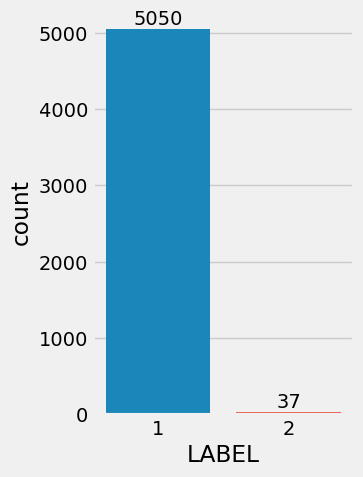

In [16]:
plt.figure(figsize=(3,5))
ax= sns.countplot(x='LABEL', data = train_df)
ax.bar_label(ax.containers[0])

As it may seem again there is a huge imbalance inn our data which isn't good for KNN. We need to balance it using some resampling technique and I will use RandomOverSampler for this data. To show the efficiency, I will first train the model without replacing. Then I will use replacing for the comparison.

First off all I want to replace 2->1 and 1->0 because it is better to deal with zeros and ones


In [17]:
# Replacing Labels
train_df['LABEL'] = train_df['LABEL'].replace({2: 1, 1: 0})

# Check unique values after replacement
print(train_df.LABEL.unique())


[1 0]


When an exoplanet passes in front of a star, we lose the information of the lighwave coming from the star for a while. We can see this situation happening by plotting the wavelenghts.

In [18]:
plot_df = train_df.drop(['LABEL'], axis=1)
plot_df
#we get ridd of label coloumn before we plot. Because it is unnecessary information


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


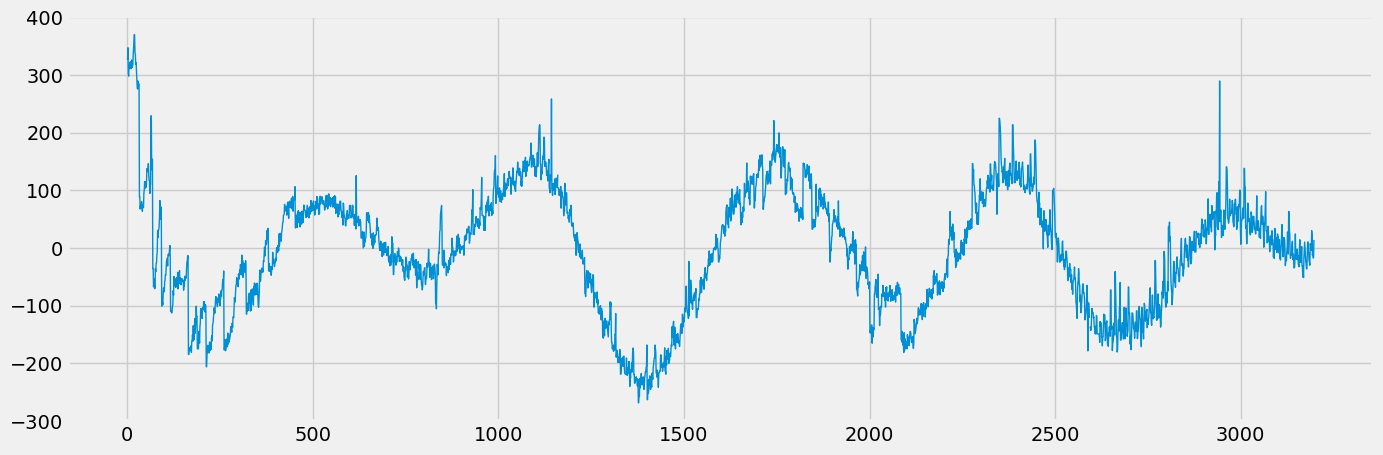

In [19]:
time = range(1,3198)
flux_value= plot_df.iloc[3,:].values
plt.figure ( figsize =(15,5))
plt.plot(time, flux_value, linewidth =1 )

This is a star with an exoplanet. By the curve we clearly understand there is some obstacle that cuts light inofrmation periodically. Below I will try with a non exoplanet star.

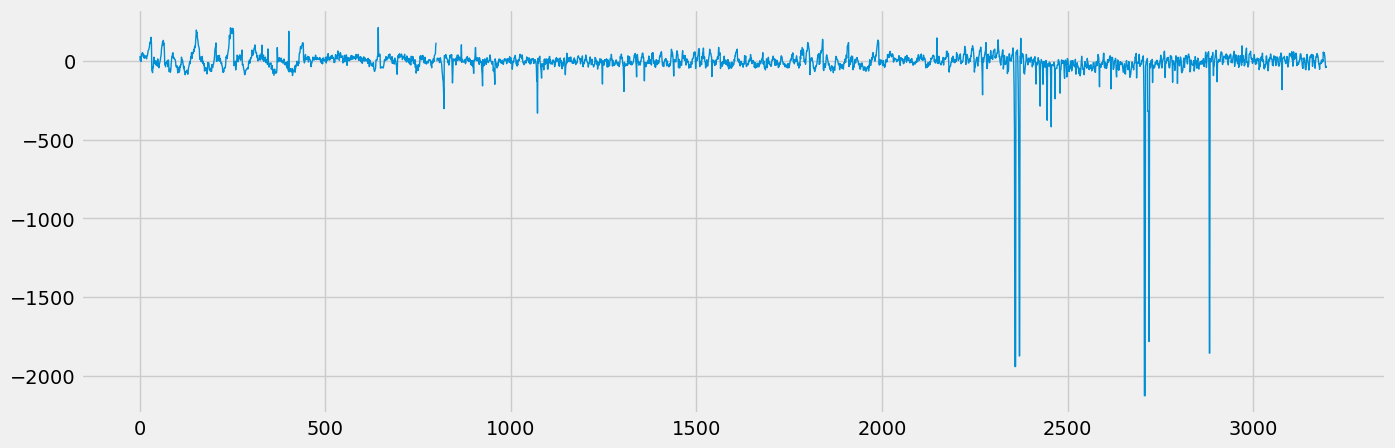

In [20]:
time = range(1,3198)
flux_value= plot_df.iloc[100,:].values
plt.figure ( figsize =(15,5))
plt.plot(time, flux_value, linewidth =1 )

We can see that there is no significant change in the light but there are some extreme outlyers. We can see them between 2000-3000 for this star. For KNN classifier this kind of extremes are can be missleading. So we need to deal with it.

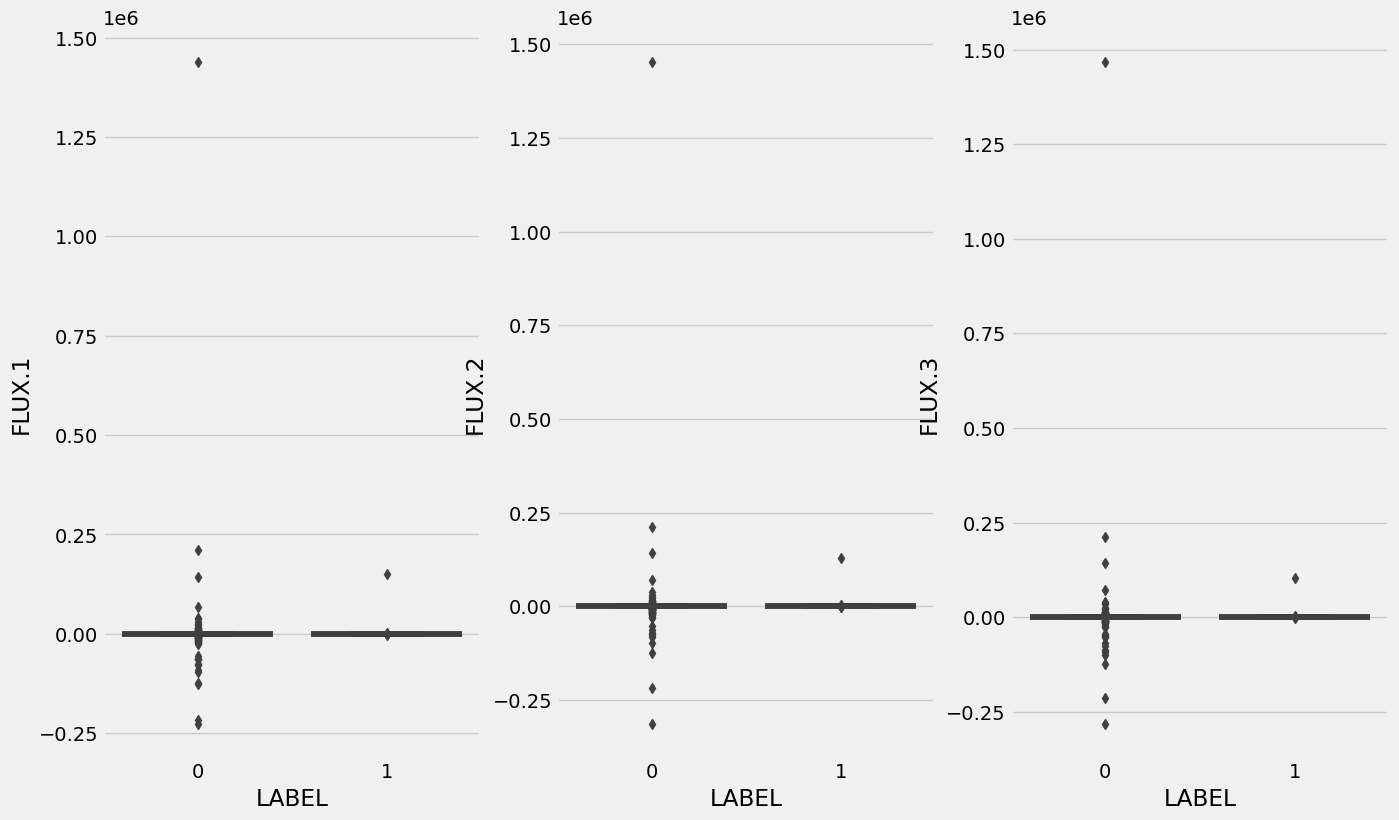

In [21]:
plt.figure(figsize=(20,9))
for i in range(1,4):
    plt.subplot(1, 4,i)
    sns.boxplot(data= train_df, x='LABEL', y='FLUX.'+str(i))

Also here we can see that we have some extremeoutlayers between 1.25-1.50. I will detect and eleminate them

In [22]:
train_df.drop(train_df[train_df['FLUX.2']> 0.25e6].index, axis =0, inplace = True)

<Axes: xlabel='LABEL', ylabel='FLUX.768'>

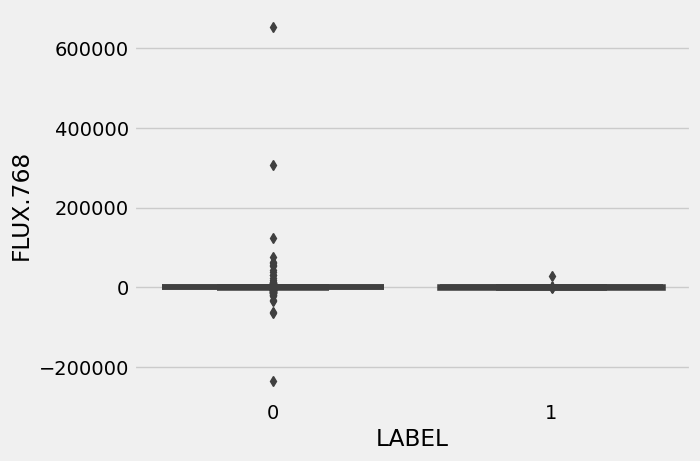

In [23]:
sns.boxplot(data = train_df, x = 'LABEL', y = 'FLUX.' + str(np.random.randint(1000)))

In [24]:

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


# Assuming train_df is your dataframe

def impute_missing_values(df, target_column):
    # Split the data into two parts: one with missing values and one without
    df_missing = df[df[target_column].isna()]
    df_no_missing = df[df[target_column].notna()]

    # Separate features and target
    X_train = df_no_missing.drop(columns=[target_column])
    y_train = df_no_missing[target_column]

    X_missing = df_missing.drop(columns=[target_column])

    # Create a pipeline with an imputer and the model
    model = make_pipeline(SimpleImputer(strategy='mean'), HistGradientBoostingRegressor())

    # Train the model
    model.fit(X_train, y_train)

    # Predict the missing values
    y_pred = model.predict(X_missing)

    # Fill in the missing values
    df.loc[df[target_column].isna(), target_column] = y_pred

    return df

# List of columns with missing values
columns_with_missing_values = [col for col in train_df.columns if train_df[col].isna().sum() > 0]

# Impute missing values for each column
for column in columns_with_missing_values:
    train_df = impute_missing_values(train_df, column)

# Verify that there are no missing values
print(train_df.isna().sum())


LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64


<Axes: >

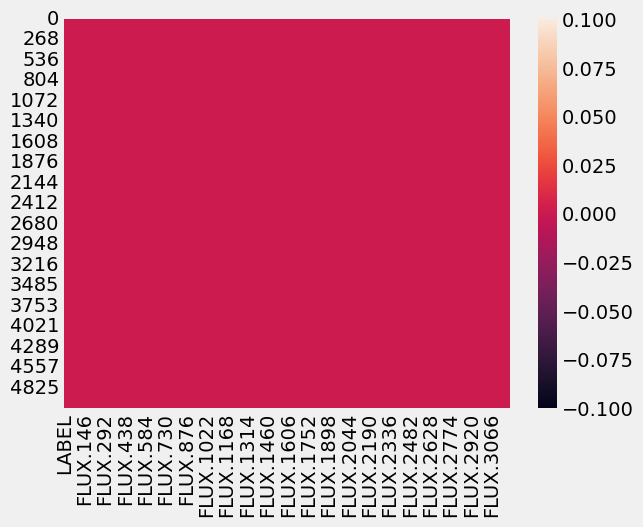

In [25]:
sns.heatmap(train_df.isnull())


With the verification from the graph, we can understand that HistGradientBoostingRegressor with a simple pipeline filled all the missing valuess. I used 'HistGradientBoostingRegressor' because it is good for hoigh feature number datas and also it is scalable which is again reduces computative complexity in a big data.
Advantages of HistGradientBoostingRegressor:

Speed: By using histogram-based binning, it significantly reduces the computational burden, making it faster than traditional gradient boosting methods.

Memory Efficiency: The histogram approach also reduces memory usage, allowing it to handle larger datasets.

Ease of Use: Built-in handling of missing values and categorical features simplifies preprocessing steps.

Accuracy: Maintains high predictive accuracy through effective regularization techniques.


Implementing KNN after handling the extreme outliers but have yet not balanced the data

It would be interesting to compare the results with and without imbalance in our data. Let us first start with imbalanced data:-

In [26]:
#Extracting independent (x) and dependent(y) features from train df
x = train_df.drop(['LABEL'], axis= 1)
y = train_df.LABEL


In [27]:
#Splitting this data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 0)

In [28]:
#Feature Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [29]:
# Checking the minimum, mean and maxmum value after scaling
print("X_train after scaling ~\n")
print(f"Minimum:- {round(np.min(X_train_sc),2)}\nMean:- {round(np.mean(X_train_sc),2)}\nMax:- {round(np.max(X_train_sc), 2)}\n")
print("--------------------------------\n")
print("X_test after scaling ~\n")
print(f"Minimum:- {round(np.min(X_test_sc),2)}\nMean:- {round(np.mean(X_test_sc),2)}\nMax:- {round(np.max(X_test_sc), 2)}\n")

X_train after scaling ~

Minimum:- -57.1
Mean:- 0.0
Max:- 59.46

--------------------------------

X_test after scaling ~

Minimum:- -133.38
Mean:- 0.0
Max:- 169.64



In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Fiting the KNN Classifier Model on to the training data
knn_classifier = KNC(n_neighbors=5, metric='minkowski', p=2)

# Fit the model
knn_classifier.fit(X_train_sc, y_train)

# Predict
y_pred = knn_classifier.predict(X_test_sc)

# Results
print('\nValidation accuracy of KNN is', accuracy_score(y_test, y_pred))
print("\n-------------------------------------------------------")
print("\nClassification report :\n", (classification_report(y_test, y_pred)))


plt.suptitle("KNN Performance before handling the imbalance in the data", color='r', weight='bold')

# Plotting the confusion matrix

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print('\nValidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y_test,y_pred)))

#Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, cmap=plt.cm.Blues)

plt.xlabel("True Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.ylabel("Predicited Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'purple')



Validation accuracy of KNN is 0.991480996068152

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1513
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.99      0.99      1526


Validation accuracy of KNN is 0.991480996068152

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1513
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.99      0.99      1526



NameError: name 'ConfusionMatrixDisplay' is not defined

<Figure size 640x480 with 0 Axes>

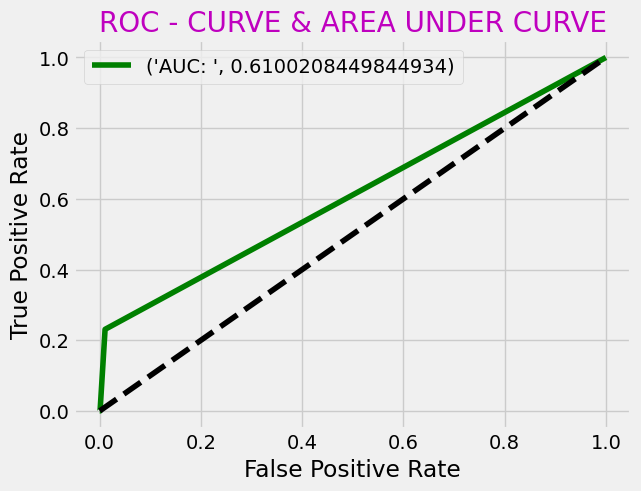

In [ ]:


# ROC curve and Area under the curve plotting
predicting_probabilities = knn_classifier.predict_proba(X_test_sc)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predicting_probabilities)
plt.plot(fpr, tpr, label=("AUC: ", auc(fpr, tpr)), color="g")
plt.plot([0, 1], [0, 1], "k--")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize=20, color='m')

plt.show()


because of the imbalance in our dataset we have .

precision    recall  f1-score   support

1       0.00      0.00      0.00        13

And even though the accuracy is so high, we have a bad model here.

Handling the imbalance in the data and then applying KNN

There are many techniques available out of which we will be trying RandomOverSampler:-

RandomOverSampler is over-sampling by duplicating some of the original samples of the minority class

In [ ]:
#handling the imbalanced data using imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)


<Axes: xlabel='LABEL'>

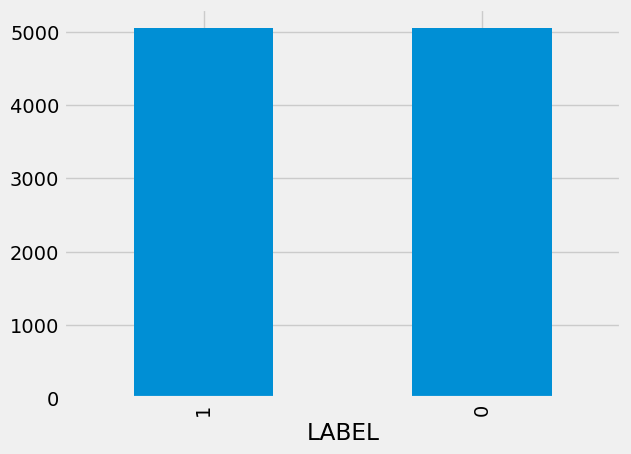

In [ ]:
y_ros.value_counts().plot(kind ='bar')

NOW, we have a balance between the labels on our data.

In [ ]:
from collections import Counter
print(f'Before ROS: - {Counter(y)}\nAfter ROS:- {Counter(y_ros)}')

Before ROS: - Counter({0: 5049, 1: 37})
After ROS:- Counter({1: 5049, 0: 5049})


we have added 5012 datapoints to our data.

RE-DOING ALL THE STEPS AFTER BALANCING and FEATURE SELECTING (PCA) THE DATA AND CHECKING THE MODEL PERFORMNACE INCREASE


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros,test_size = 0.3, random_state = 0)

In [33]:
from sklearn.decomposition import PCA
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
# Convert to DataFrame and save to CSV because of the performance issues. Otherwise, it will take a lot of time to run the code again each time we run the notebook.
pd.DataFrame(X_train_sc).to_csv('X_train_sc.csv', index=False)
pd.DataFrame(X_test_sc).to_csv('X_test_sc.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)




In [ ]:
# Checking the minimum, mean and maxmum value after scaling
print("X_train after scaling ~\n")
print(f"Minimum:- {round(np.min(X_train_sc),2)}\nMean:- {round(np.mean(X_train_sc),2)}\nMax:- {round(np.max(X_train_sc), 2)}\n")
print("--------------------------------\n")
print("X_test after scaling ~\n")
print(f"Minimum:- {round(np.min(X_test_sc),2)}\nMean:- {round(np.mean(X_test_sc),2)}\nMax:- {round(np.max(X_test_sc), 2)}\n")

X_train after scaling ~

Minimum:- -81.01
Mean:- 0.0
Max:- 83.74

--------------------------------

X_test after scaling ~

Minimum:- -148.01
Mean:- 0.01
Max:- 438.05




Validation accuracy of KNN is 0.991480996068152

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1513
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.99      0.99      1526



Text(0.5, 1.0, 'CONFUSION MATRIX')

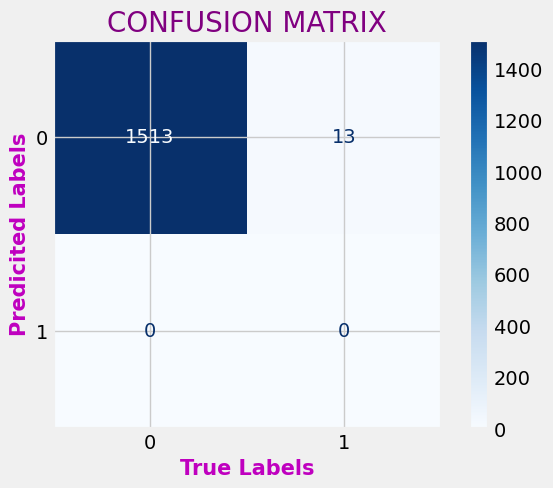

In [31]:
knn_classifier = KNC( n_neighbors=5,metric='minkowski', p=2)
knn_classifier.fit(X_train_sc,y_train)
y_pred= knn_classifier.predict(X_test_sc)

from sklearn.metrics import ConfusionMatrixDisplay

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print('\nValidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y_test,y_pred)))

#Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, cmap=plt.cm.Blues)

plt.xlabel("True Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.ylabel("Predicited Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'purple')



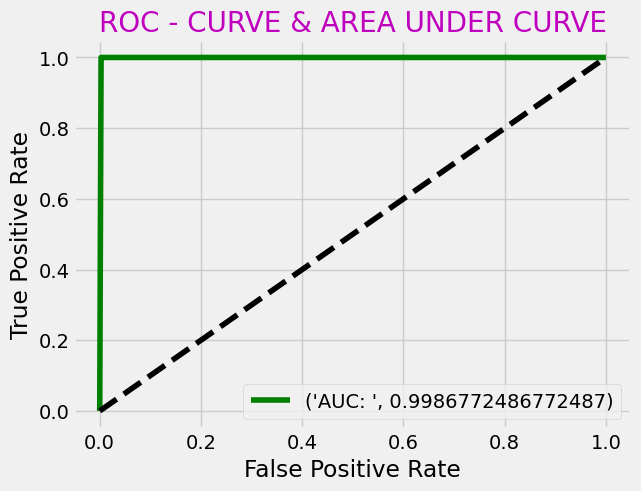

In [ ]:


# ROC curve and Area under the curve plotting
predicting_probabilities = knn_classifier.predict_proba(X_test_sc)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predicting_probabilities)
plt.plot(fpr, tpr, label=("AUC: ", auc(fpr, tpr)), color="g")
plt.plot([0, 1], [0, 1], "k--")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize=20, color='m')
plt.show()

FINDING THE OPTIMAL VALUE OF K

In [ ]:
 #Create function to fetch the optimal value of K
def optimal_Kval_KNN(start_k, end_k, x_train, x_test, y_train, y_test, progress = True):
    ''' 
    This function takes in the following arguments -
    start_k - start value of k
    end_k - end value of k
    x_train - independent training values for training the KNN
    x_test - independent testing values for prediction
    y_train - dependent training values for training KNN
    y_test - dependent testing values for computing error rate
    progress - if true shows the progress for each k (by default its set to True)
    '''
    # Header
    print(f"Fetching the optimal value of K in between {start_k} & {end_k} ~\n\nIn progress...")
    
    # Empty list to append error rate
    mean_err = []
    for K in range(start_k, end_k + 1):                         # Generates K from start to end-1 values
        knn = KNC(n_neighbors = K)                              # Build KNN for respective K value
        knn.fit(x_train, y_train)                               # Train the model
        err_rate = np.mean(knn.predict(x_test) != y_test)       # Get the error rate
        mean_err.append(err_rate)                               # Append it
        # If progress is true display the error rate for each K
        if progress == True:print(f'For K = {K}, mean error = {err_rate:.3}')
        
    # Get the optimal value of k and corresponding value of mean error
    k, val = mean_err.index(min(mean_err))+1, min(mean_err)
    
    # Footer
    print('\nDone! Here is how error rate varies wrt to K values:- \n')
    
    # Display how error rate changes wrt K values and mark the optimal K value
    plt.figure(figsize = (5,5))
    plt.plot(range(start_k,end_k + 1), mean_err, 'mo--', markersize = 8, markerfacecolor = 'c',
            linewidth = 1)          # plots all mean error wrt K values
    plt.plot(k, val, marker = 'o', markersize = 8, markerfacecolor = 'gold', 
             markeredgecolor = 'g') # highlits the optimal K
    plt.title(f"The optimal performance is obtained at K = {k}", color = 'r', weight = 'bold',
             fontsize = 15)
    plt.ylabel("Error Rate", color = 'olive', fontsize = 13)
    plt.xlabel("K values", color = 'olive', fontsize = 13)
    
    '''returns the optimal value of k'''
    return k

Fetching the optimal value of K in between 1 & 10 ~

In progress...
For K = 1, mean error = 0.00132
For K = 2, mean error = 0.00132
For K = 3, mean error = 0.00297
For K = 4, mean error = 0.00297
For K = 5, mean error = 0.00462
For K = 6, mean error = 0.00462
For K = 7, mean error = 0.00528
For K = 8, mean error = 0.00528
For K = 9, mean error = 0.00792
For K = 10, mean error = 0.00792

Done! Here is how error rate varies wrt to K values:- 



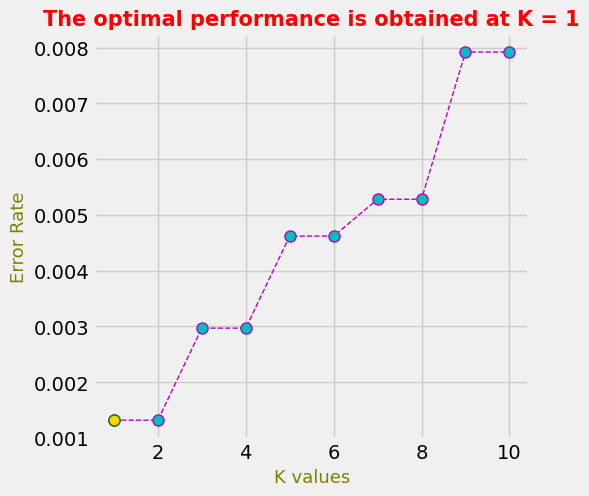

In [ ]:
k = optimal_Kval_KNN(1, 10, X_train_sc, X_test_sc, y_train, y_test)



Validation accuracy of KNN is 0.9986798679867986

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1518

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



Text(0.5, 1.0, 'CONFUSION MATRIX')

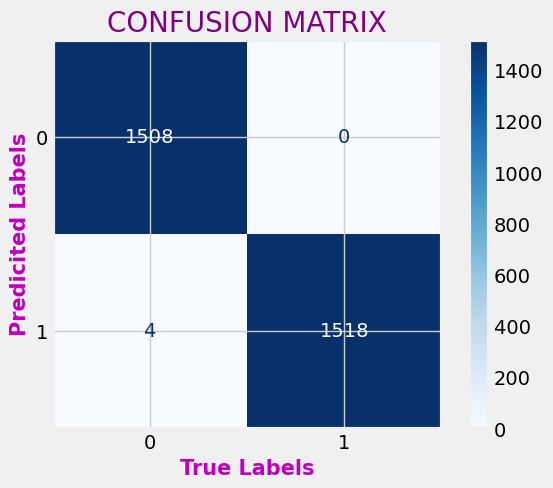

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

#Let's try for K = 1
knn_classifier = KNC(n_neighbors=1,metric='minkowski',p=2)  
#'''metric is to be by default minkowski for p = 2 to calculate the Eucledian distances'''

# Fit the model
knn_classifier.fit(X_train_sc, y_train)

# Predict
y_pred = knn_classifier.predict(X_test_sc)

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print('\nValidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y_test,y_pred)))

#Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, cmap=plt.cm.Blues)

plt.xlabel("True Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.ylabel("Predicited Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'purple')


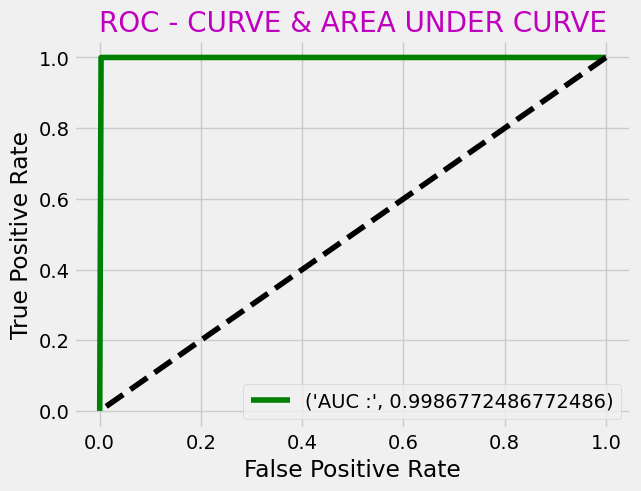

In [ ]:

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_classifier.predict_proba(X_test_sc)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)

plt.plot(fpr,tpr,label = ("AUC :",auc(fpr,tpr)),color = "g")
plt.plot([1,0],[1,0], 'k--')
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20, color = 'm')
plt.show()

TESTING THE MODEL IN A REAL ENVIRONMENT


In [ ]:
pd_real = pd.read_csv('/Users/yusufmehmet/Documents/GitHub/yusufmehmetcolak-2/exoTest.csv')
pd_real.head

<bound method NDFrame.head of      LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0        2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
1        2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
2        2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
3        2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
4        2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   
..     ...      ...      ...      ...      ...      ...      ...      ...   
565      1   374.46   326.06   319.87   338.23   251.54   209.84   186.35   
566      1    -0.36     4.96     6.25     4.20     8.26    -9.53   -10.10   
567      1   -54.01   -44.13   -41.23   -42.82   -39.47   -24.88   -31.14   
568      1    91.36    85.60    48.81    48.69    70.05    22.30    11.63   
569      1  3071.19  2782.53  2608.69  2325.47  2089.37  1769.56  1421.09   

      FLUX.8   FLUX.9  ...  FLUX.3188  FLUX.3

In [ ]:
pd_real.columns

Index(['LABEL', 'FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6',
       'FLUX.7', 'FLUX.8', 'FLUX.9',
       ...
       'FLUX.3188', 'FLUX.3189', 'FLUX.3190', 'FLUX.3191', 'FLUX.3192',
       'FLUX.3193', 'FLUX.3194', 'FLUX.3195', 'FLUX.3196', 'FLUX.3197'],
      dtype='object', length=3198)

In [ ]:
pd_label = pd_real['LABEL'].replace({2: 1, 1: 0})
pd_real = pd_real.drop(['LABEL'], axis = 1)
pd_label


0      1
1      1
2      1
3      1
4      1
      ..
565    0
566    0
567    0
568    0
569    0
Name: LABEL, Length: 570, dtype: int64

In [ ]:
pd_real

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,107.28,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,-10.48,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,-14.78,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,-4.36,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


Okay now we have a set of label and values and this is a dataset that the algorithm never encountered before.


Validation accuracy of KNN is 0.980701754385965

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       562
           1       0.20      0.12      0.15         8

    accuracy                           0.98       570
   macro avg       0.59      0.56      0.57       570
weighted avg       0.98      0.98      0.98       570



<Figure size 1500x1100 with 0 Axes>

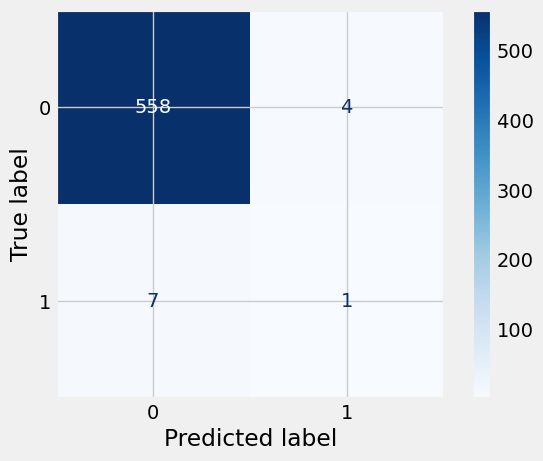

array([[1498,   14],
       [   0, 1518]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

predictions = knn_classifier.predict(pd_real)
print('\nValidation accuracy of KNN is', accuracy_score(predictions,pd_label))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(predictions,pd_label)))

plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace = 0.3)
ConfusionMatrixDisplay.from_predictions(predictions, pd_label, cmap=plt.cm.Blues)
plt.show()
conf_matrix
